In [1]:
%matplotlib inline
from hydrophone_data_processing import load, preprocessing
import obspy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [2]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.{}'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.{}'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.{}'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.{}'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.{}'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.{}']

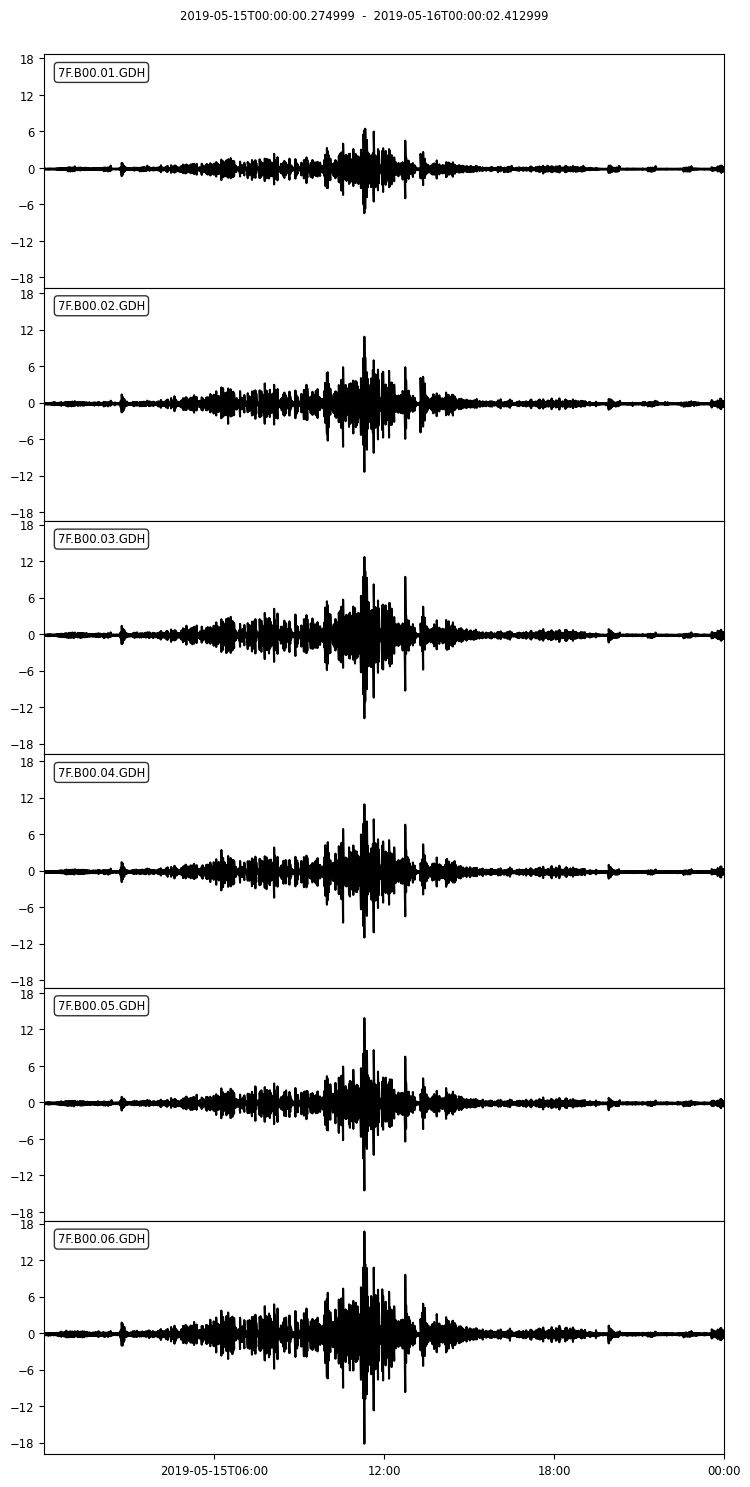

In [13]:
day135 = load.import_corrected_data_for_single_day(paths=[p.format(135) for p in paths])
day135.decimate(factor=10)
day135.decimate(factor=5)
# day135.filter(type='lowpass', freq=20, corners=4, zerophase=True)
x=day135.plot()

In [31]:
day135

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-15T00:00:02.319999Z - 2019-05-16T00:00:01.969999Z | 20.0 Hz, 1727994 samples
7F.B00.02.GDH | 2019-05-15T00:00:00.990999Z - 2019-05-16T00:00:00.890999Z | 20.0 Hz, 1727999 samples
7F.B00.03.GDH | 2019-05-15T00:00:01.849999Z - 2019-05-16T00:00:01.599999Z | 20.0 Hz, 1727996 samples
7F.B00.04.GDH | 2019-05-15T00:00:03.010999Z - 2019-05-16T00:00:01.510999Z | 20.0 Hz, 1727971 samples
7F.B00.05.GDH | 2019-05-15T00:00:00.274999Z - 2019-05-16T00:00:01.074999Z | 20.0 Hz, 1728017 samples
7F.B00.06.GDH | 2019-05-15T00:00:02.062999Z - 2019-05-16T00:00:02.412999Z | 20.0 Hz, 1728008 samples

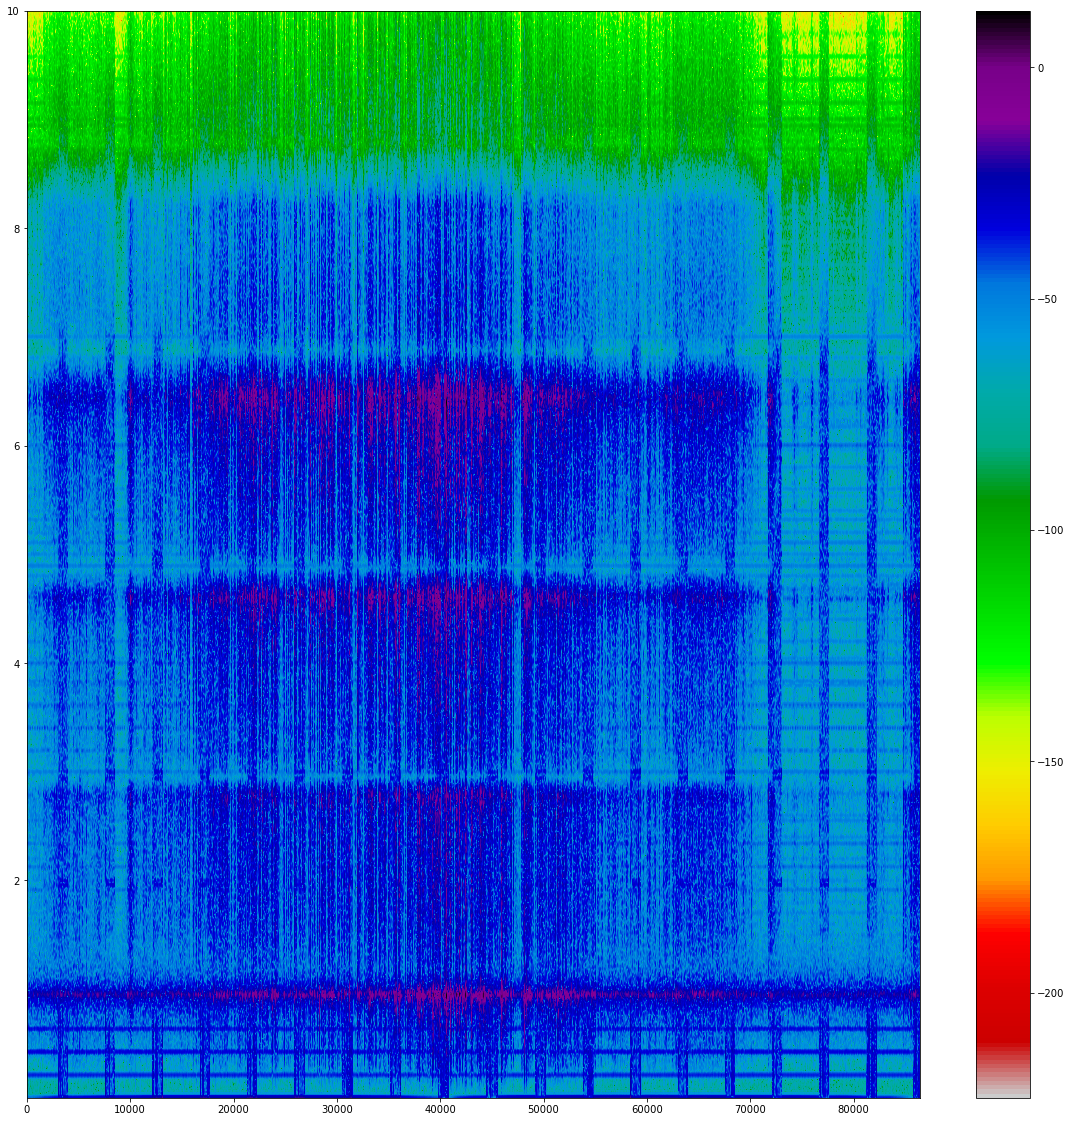

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = day135[0].spectrogram(per_lap=0, dbscale=True, wlen=60, cmap='nipy_spectral_r', axes=ax, mult=10)
fig.colorbar(ax.images[0])

In [3]:
days = np.arange(135, 146, 1)
days

array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145])

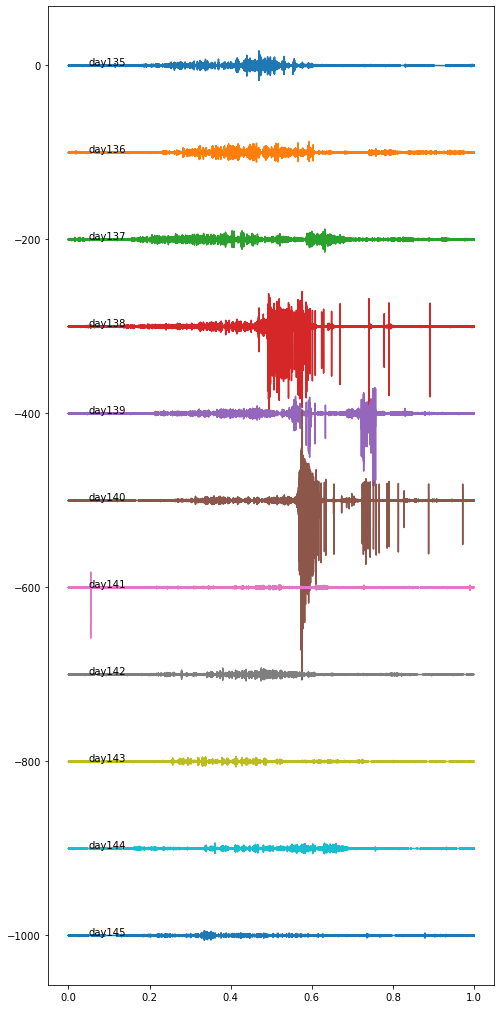

In [4]:
fig, ax = plt.subplots(figsize=(8, 18))
for n, d in enumerate(days):
    st = load.import_corrected_data_for_single_day(paths=[p.format(d) for p in paths])
    
    x = st[0].times('matplotlib')
    x = x - x.min()
    
    y = st[0].data - n*100
    
    # ax.plot(st[0].times('matplotlib'), st[0].data - d//days.max())
    ax.plot(x, y)
    ax.text(s='day{}'.format(d), x=0.05, y=-n*100, fontsize=15)

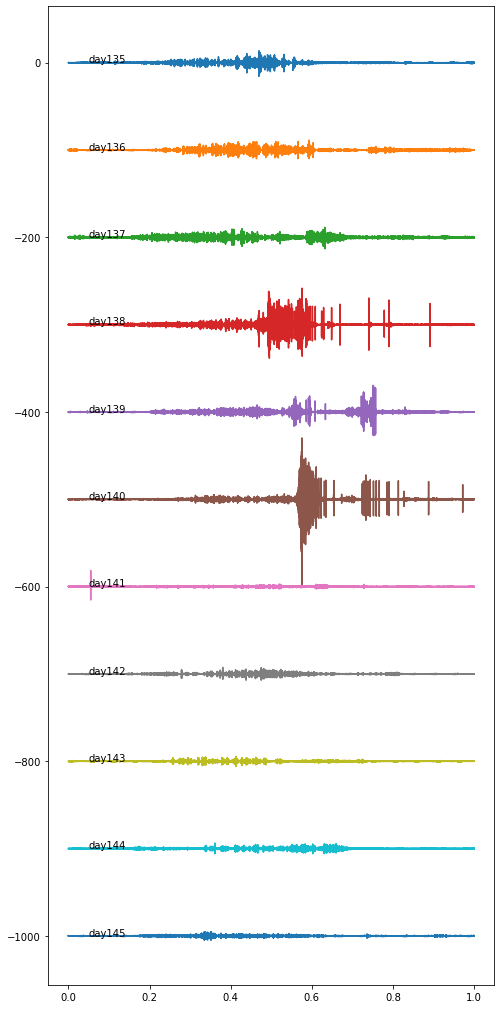

In [5]:
fig, ax = plt.subplots(figsize=(8, 18))
for n, d in enumerate(days):
    st = load.import_corrected_data_for_single_day(paths=[p.format(d) for p in paths])
    st.filter(type='lowpass', corners=4, freq=40, zerophase=True)
    x = st[0].times('matplotlib')
    x = x - x.min()
    
    y = st[0].data - n*100
    
    # ax.plot(st[0].times('matplotlib'), st[0].data - d//days.max())
    ax.plot(x, y)
    ax.text(s='day{}'.format(d), x=0.05, y=-n*100, fontsize=15)

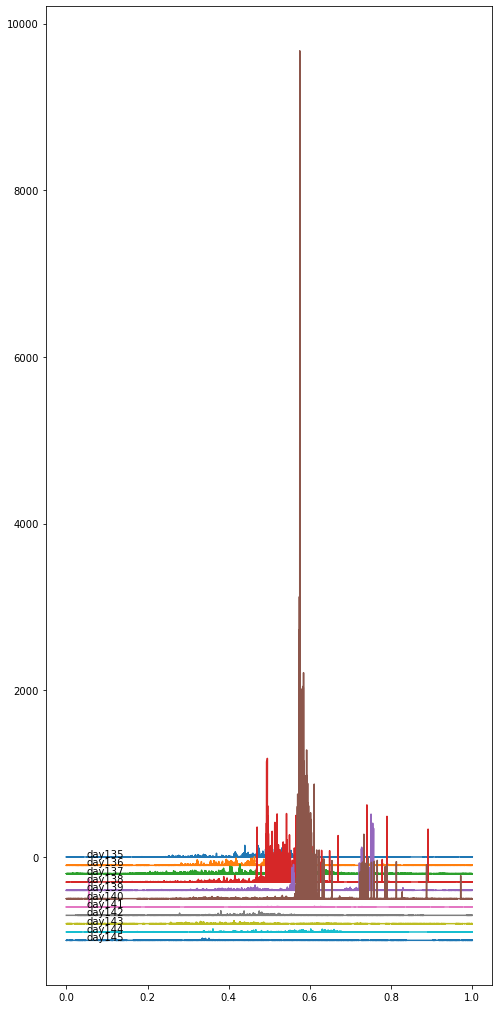

In [6]:
fig, ax = plt.subplots(figsize=(8, 18))
for n, d in enumerate(days):
    st = load.import_corrected_data_for_single_day(paths=[p.format(d) for p in paths])
    st.filter(type='lowpass', corners=4, freq=40, zerophase=True)
    for tr in st:
        tr.data = tr.data**2
    x = st[0].times('matplotlib')
    x = x - x.min()
    
    y = st[0].data - n*100
    
    # ax.plot(st[0].times('matplotlib'), st[0].data - d//days.max())
    ax.plot(x, y)
    ax.text(s='day{}'.format(d), x=0.05, y=-n*100, fontsize=15)

In [29]:
# st135 = load.import_corrected_data_for_single_day(paths=[p.format(135) for p in paths])
# st135 = st135.slice(starttime=obspy.UTCDateTime('2019-05-15T00:00:10.0Z'))
# st135.filter(type='lowpass', freq=40, corners=4, zerophase=True)
# st135.decimate(factor=10)

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:01.999999Z | 100.0 Hz, 8639201 samples
7F.B00.02.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:00.919999Z | 100.0 Hz, 8639093 samples
7F.B00.03.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:01.629999Z | 100.0 Hz, 8639164 samples
7F.B00.04.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:01.529999Z | 100.0 Hz, 8639154 samples
7F.B00.05.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:01.109999Z | 100.0 Hz, 8639112 samples
7F.B00.06.GDH | 2019-05-15T00:00:09.999999Z - 2019-05-16T00:00:02.429999Z | 100.0 Hz, 8639244 samples

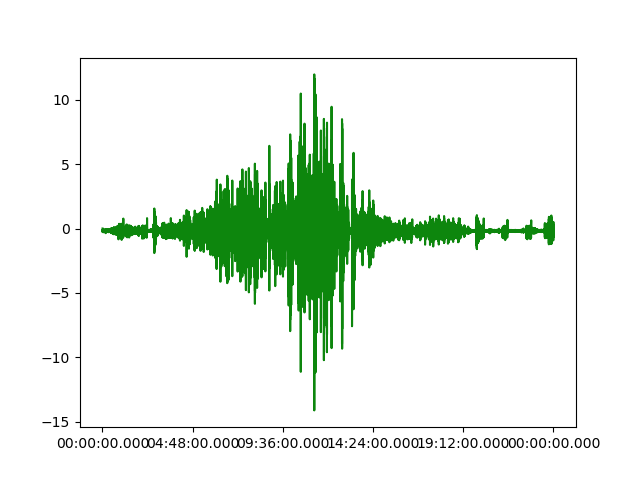

In [30]:
fig, ax = plt.subplots()
for tr in st135:
    ax.plot(tr.times('matplotlib'), tr.data, alpha=0.95, color='green')
    ax.xaxis.set_major_formatter(PrecisionDateFormatter('%H:%M:%S.{ms}'))
    break

In [3]:
st138 = load.import_corrected_data_for_single_day(paths=paths)
st138.decimate(factor=10)

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.017000Z | 100.0 Hz, 8639812 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.840000Z | 100.0 Hz, 8639931 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.129000Z | 100.0 Hz, 8640045 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.081000Z | 100.0 Hz, 8639875 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 100.0 Hz, 8639833 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.372000Z | 100.0 Hz, 8639919 samples

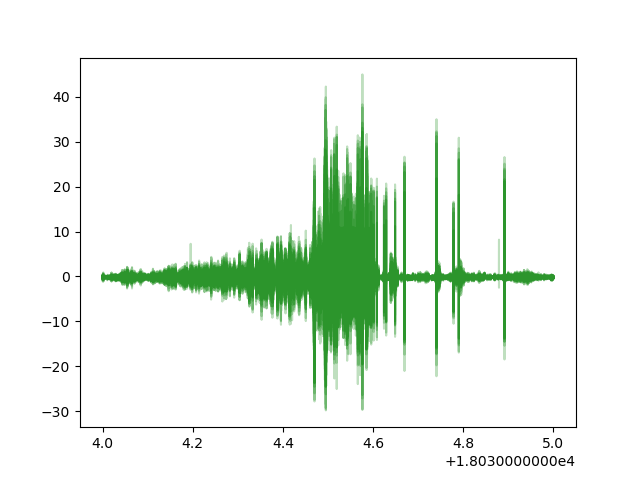

In [4]:
fig, ax = plt.subplots()
for tr in st138:
    ax.plot(tr.times('matplotlib'), tr.data, alpha=0.25, color='green')

In [5]:
st138.filter(type='lowpass', corners=4, zerophase=True, freq=True)

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.017000Z | 100.0 Hz, 8639812 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.840000Z | 100.0 Hz, 8639931 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.129000Z | 100.0 Hz, 8640045 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.081000Z | 100.0 Hz, 8639875 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 100.0 Hz, 8639833 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.372000Z | 100.0 Hz, 8639919 samples

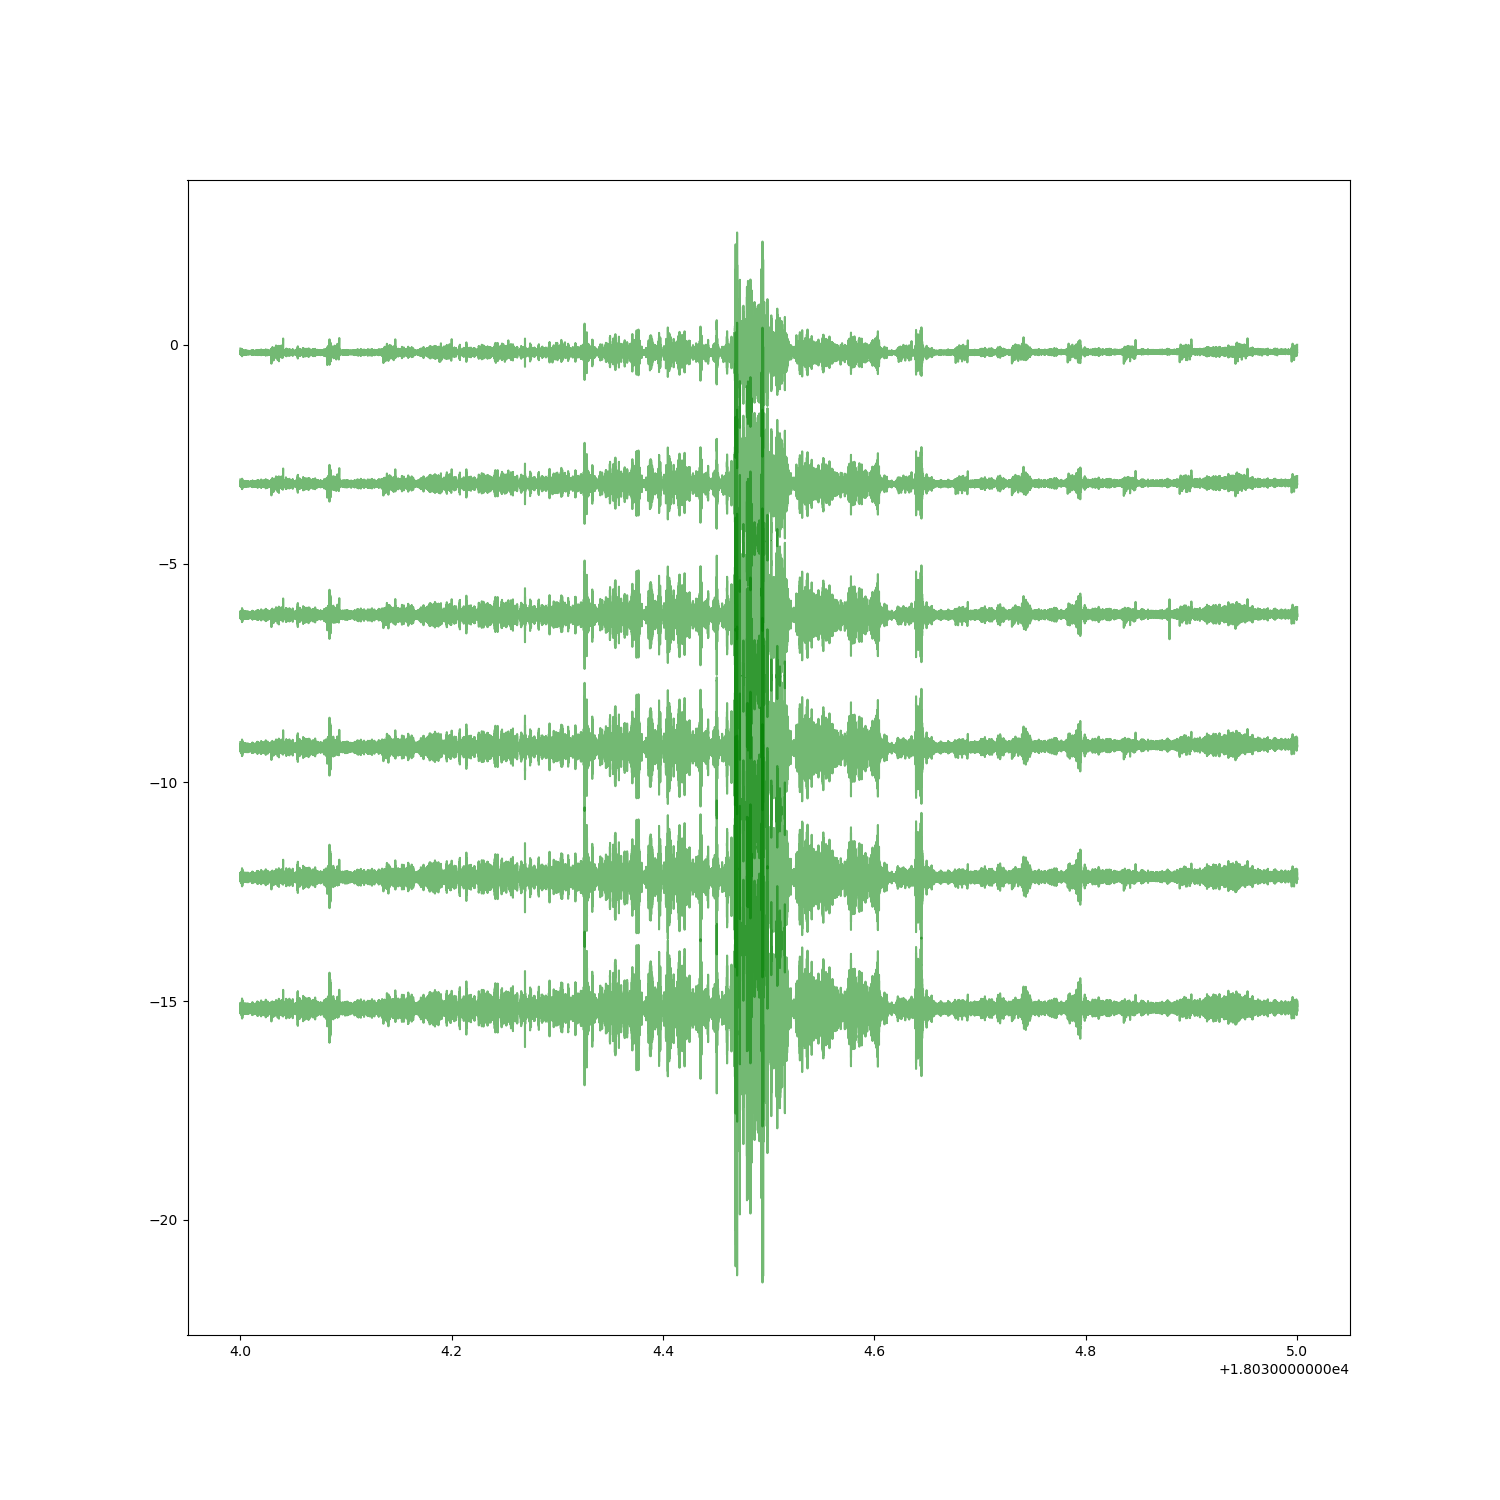

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
for n, tr in enumerate(st138):
    ax.plot(tr.times('matplotlib'), tr.data - n*3, alpha=0.55, color='green')

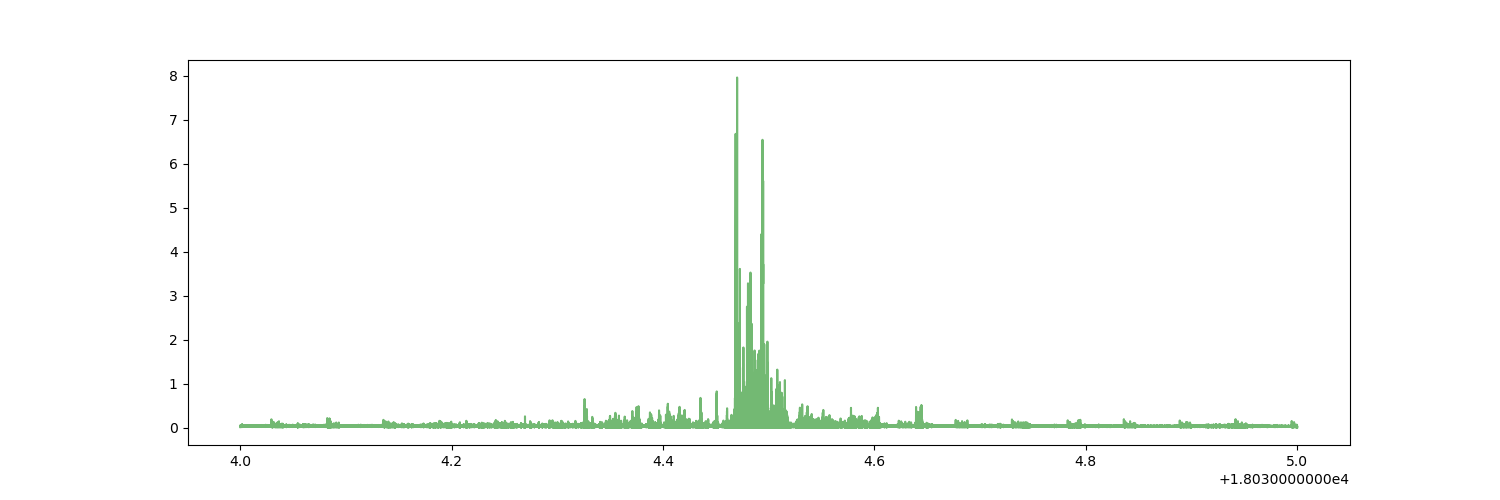

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
for n, tr in enumerate(st138):
    ax.plot(tr.times('matplotlib'), tr.data**2, alpha=0.55, color='green')
    break